### For PaddleOCR installation and data processing: follow ppocr_train_det.ipynb notebook.

other models are at trained models: https://github.com/PaddlePaddle/PaddleOCR/blob/main/doc/doc_en/ppocr_introduction_en.md

In [25]:
### to download pretrained models
# !wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/chinese/en_PP-OCRv3_rec_train.tar

# !pwd
### other models are at: https://github.com/PaddlePaddle/PaddleOCR/blob/main/doc/doc_en/ppocr_introduction_en.md


--2024-05-24 12:49:50--  https://paddleocr.bj.bcebos.com/PP-OCRv3/chinese/en_PP-OCRv3_rec_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1203:0:ff:b0bb:4f27
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-05-24 12:49:51 ERROR 404: Not Found.



In [26]:
%cd pretrain_models
!tar -xf ch_PP-OCRv3_rec_train.tar #&& rm -rf en_PP-OCRv3_rec_train.tar

/home/frinks2/subhra/PaddleOCR/pretrain_models


In [27]:
%cd ..

/home/frinks2/subhra/PaddleOCR


#### Change required config:
- You can change required hyperparameters from the respective .yml file present inside config folder
- Followings are some examples: <br>
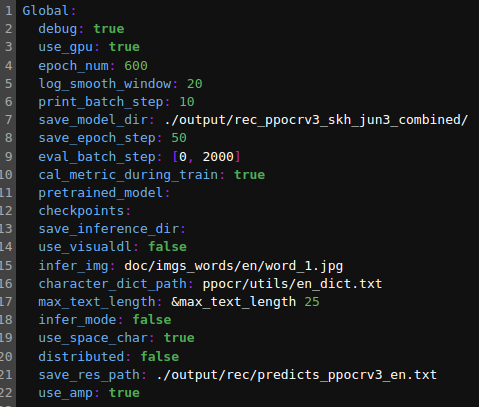

#### Training:

In [ ]:
!pwd
# GPU training Support single card and multi-card training
# Training icdar15 English data and The training log will be automatically saved as train.log under "{save_model_dir}"

#specify the single card training(Long training time, not recommended)
!python3 ./tools/train.py -c configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml -o Global.pretrained_model=pretrain_models/en_PP-OCRv3_rec_train/best_accuracy 

/bin/bash: /home/frinksserver/anaconda3/envs/paddle/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/frinksserver/Deepak/OCR/models/paddleocr_train
/bin/bash: /home/frinksserver/anaconda3/envs/paddle/lib/libtinfo.so.6: no version information available (required by /bin/bash)
[2024/06/27 19:10:11] ppocr INFO: Architecture : 
[2024/06/27 19:10:11] ppocr INFO:     Backbone : 
[2024/06/27 19:10:11] ppocr INFO:         last_conv_stride : [1, 2]
[2024/06/27 19:10:11] ppocr INFO:         last_pool_kernel_size : [2, 2]
[2024/06/27 19:10:11] ppocr INFO:         last_pool_type : avg
[2024/06/27 19:10:11] ppocr INFO:         name : MobileNetV1Enhance
[2024/06/27 19:10:11] ppocr INFO:         scale : 0.5
[2024/06/27 19:10:11] ppocr INFO:     Head : 
[2024/06/27 19:10:11] ppocr INFO:         head_list : 
[2024/06/27 19:10:11] ppocr INFO:             CTCHead : 
[2024/06/27 19:10:11] ppocr INFO:                 Head : 
[2024/06/27 19:10:11] ppocr INFO:                

/home/frinksserver3/OCR/models/PaddleOCR/pretrain_models


### Resume training:

In [3]:
!pwd
# GPU training Support single card and multi-card training
# Training icdar15 English data and The training log will be automatically saved as train.log under "{save_model_dir}"

#specify the single card training(Long training time, not recommended)
!python3 ./tools/train.py -c configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml -o Global.pretrained_model=pretrain_models/rec_ppocrv3_skh_jun3/best_accuracy 

/bin/bash: /home/frinksserver/anaconda3/envs/paddle/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/frinksserver/PaddleOCR
/bin/bash: /home/frinksserver/anaconda3/envs/paddle/lib/libtinfo.so.6: no version information available (required by /bin/bash)
[2024/06/04 10:20:26] ppocr INFO: Architecture : 
[2024/06/04 10:20:26] ppocr INFO:     Backbone : 
[2024/06/04 10:20:26] ppocr INFO:         last_conv_stride : [1, 2]
[2024/06/04 10:20:26] ppocr INFO:         last_pool_kernel_size : [2, 2]
[2024/06/04 10:20:26] ppocr INFO:         last_pool_type : avg
[2024/06/04 10:20:26] ppocr INFO:         name : MobileNetV1Enhance
[2024/06/04 10:20:26] ppocr INFO:         scale : 0.5
[2024/06/04 10:20:26] ppocr INFO:     Head : 
[2024/06/04 10:20:26] ppocr INFO:         head_list : 
[2024/06/04 10:20:26] ppocr INFO:             CTCHead : 
[2024/06/04 10:20:26] ppocr INFO:                 Head : 
[2024/06/04 10:20:26] ppocr INFO:                     fc_decay : 1e-05
[2

/home/frinksserver3/OCR/models/PaddleOCR


In [1]:
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 


I0627 19:09:46.743402 106575 interpretercore.cc:237] New Executor is Running.
W0627 19:09:46.743577 106575 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.6, Driver API Version: 11.4, Runtime API Version: 11.2
W0627 19:09:46.750433 106575 gpu_resources.cc:149] device: 0, cuDNN Version: 8.2.


PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


I0627 19:09:50.538169 106575 interpreter_util.cc:518] Standalone Executor is Used.


#### exporting to .model format 

In [5]:
!python3 tools/export_model.py -c configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml -o Global.pretrained_model=/home/frinksserver/Deepak/OCR/models/paddleocr_train/output/rec_ppocrv3_skh_jun27/best_model/model  Global.save_inference_dir=./inference/rec_ppocrv3_skh_jun27/

/bin/bash: /home/frinksserver/anaconda3/envs/paddle/lib/libtinfo.so.6: no version information available (required by /bin/bash)
W0628 09:52:26.977535 212433 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.6, Driver API Version: 11.4, Runtime API Version: 11.2
W0628 09:52:26.978672 212433 gpu_resources.cc:149] device: 0, cuDNN Version: 8.2.
[2024/06/28 09:52:27] ppocr INFO: The parameter type is float16, which is converted to float32 when loading
[2024/06/28 09:52:27] ppocr INFO: load pretrain successful from /home/frinksserver/Deepak/OCR/models/paddleocr_train/output/rec_ppocrv3_skh_jun27/best_model/model
I0628 09:52:28.379514 212433 interpretercore.cc:237] New Executor is Running.
[2024/06/28 09:52:28] ppocr INFO: inference model is saved to ./inference/rec_ppocrv3_skh_jun27/inference


### inferencing on images

In [1]:
!python3 tools/infer/predict_rec.py --image_dir="/home/frinksserver/Deepak/OCR/xpaddleocrcpu/yolo_fasterrcnn_trocr_modular/crops"  --rec_model_dir=./inference/rec_ppocrv3_skh_jun27 --use_gpu True --rec_image_shape=3,48,320 --rec_char_dict_path ./ppocr/utils/en_dict.txt


E0628 14:47:27.331058 55900 analysis_config.cc:121] Please use PaddlePaddle with GPU version.
[2024/06/28 14:47:27] ppocr INFO: In PP-OCRv3, rec_image_shape parameter defaults to '3, 48, 320', if you are using recognition model with PP-OCRv2 or an older version, please set --rec_image_shape='3,32,320
[2024/06/28 14:47:31] ppocr INFO: Predicts of /home/frinksserver/Deepak/OCR/xpaddleocrcpu/yolo_fasterrcnn_trocr_modular/crops/05f9c6b9-e7b1-4e40-9ff7-99582e98b803_0_actual.png_crop_0.png:('23:19', 0.9974740743637085)
[2024/06/28 14:47:31] ppocr INFO: Predicts of /home/frinksserver/Deepak/OCR/xpaddleocrcpu/yolo_fasterrcnn_trocr_modular/crops/05f9c6b9-e7b1-4e40-9ff7-99582e98b803_0_actual.png_crop_1.png:('SY-270624RH-L1', 0.9432688355445862)
[2024/06/28 14:47:31] ppocr INFO: Predicts of /home/frinksserver/Deepak/OCR/xpaddleocrcpu/yolo_fasterrcnn_trocr_modular/crops/0bc77c2c-a715-432a-9c44-37b9210f9b2f_0_actual.png_crop_0.png:('22:10', 0.9999992251396179)
[2024/06/28 14:47:31] ppocr INFO: Pred

In [21]:
# Predict English results
!python3 tools/infer_rec.py -c configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml -o Global.pretrained_model=./output/MPSC_training_backup/best_model/model  Global.infer_img="/home/frinks2/subhra/PaddleOCR/selected2k_mpsc_skh/test"

[2024/05/24 12:35:24] ppocr INFO: Architecture : 
[2024/05/24 12:35:24] ppocr INFO:     Backbone : 
[2024/05/24 12:35:24] ppocr INFO:         last_conv_stride : [1, 2]
[2024/05/24 12:35:24] ppocr INFO:         last_pool_kernel_size : [2, 2]
[2024/05/24 12:35:24] ppocr INFO:         last_pool_type : avg
[2024/05/24 12:35:24] ppocr INFO:         name : MobileNetV1Enhance
[2024/05/24 12:35:24] ppocr INFO:         scale : 0.5
[2024/05/24 12:35:24] ppocr INFO:     Head : 
[2024/05/24 12:35:24] ppocr INFO:         head_list : 
[2024/05/24 12:35:24] ppocr INFO:             CTCHead : 
[2024/05/24 12:35:24] ppocr INFO:                 Head : 
[2024/05/24 12:35:24] ppocr INFO:                     fc_decay : 1e-05
[2024/05/24 12:35:24] ppocr INFO:                 Neck : 
[2024/05/24 12:35:24] ppocr INFO:                     depth : 2
[2024/05/24 12:35:24] ppocr INFO:                     dims : 64
[2024/05/24 12:35:24] ppocr INFO:                     hidden_dims : 120
[2024/05/24 12:35:24] ppocr I

In [13]:
# Predict English results
!python3 tools/infer_rec.py -c configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml -o Global.pretrained_model=./inference/mpsc/inference Global.infer_img="/home/frinks2/subhra/PaddleOCR/selected2k_mpsc_skh/test"

[2024/05/24 11:48:16] ppocr INFO: Architecture : 
[2024/05/24 11:48:16] ppocr INFO:     Backbone : 
[2024/05/24 11:48:16] ppocr INFO:         last_conv_stride : [1, 2]
[2024/05/24 11:48:16] ppocr INFO:         last_pool_kernel_size : [2, 2]
[2024/05/24 11:48:16] ppocr INFO:         last_pool_type : avg
[2024/05/24 11:48:16] ppocr INFO:         name : MobileNetV1Enhance
[2024/05/24 11:48:16] ppocr INFO:         scale : 0.5
[2024/05/24 11:48:16] ppocr INFO:     Head : 
[2024/05/24 11:48:16] ppocr INFO:         head_list : 
[2024/05/24 11:48:16] ppocr INFO:             CTCHead : 
[2024/05/24 11:48:16] ppocr INFO:                 Head : 
[2024/05/24 11:48:16] ppocr INFO:                     fc_decay : 1e-05
[2024/05/24 11:48:16] ppocr INFO:                 Neck : 
[2024/05/24 11:48:16] ppocr INFO:                     depth : 2
[2024/05/24 11:48:16] ppocr INFO:                     dims : 64
[2024/05/24 11:48:16] ppocr INFO:                     hidden_dims : 120
[2024/05/24 11:48:16] ppocr I

#### full paddle run: text detection ---> angle ---> recognition

In [11]:
!python3 tools/export_model.py -c configs/det/det_r50_vd_sast_icdar15.yml -o Global.pretrained_model=/home/frinks2/subhra/PaddleOCR/inference/det_r50_vd_sast_icdar15_v2.0_train/best_accuracy  Global.save_inference_dir=./inference/mpsc_det_sast/

W0524 15:14:21.205404 952992 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.6, Driver API Version: 11.4, Runtime API Version: 11.2
W0524 15:14:21.206800 952992 gpu_resources.cc:164] device: 0, cuDNN Version: 8.2.
[2024/05/24 15:14:22] ppocr INFO: load pretrain successful from /home/frinks2/subhra/PaddleOCR/inference/det_r50_vd_sast_icdar15_v2.0_train/best_accuracy
I0524 15:14:24.342077 952992 program_interpreter.cc:212] New Executor is Running.
[2024/05/24 15:14:24] ppocr INFO: inference model is saved to ./inference/mpsc_det_sast/inference


In [15]:
!python3 tools/infer/predict_system.py --image_dir="./mpsc_test/test" --det_model_dir="./inference/mpsc_det/"  --rec_model_dir="./inference/mpsc/" 

[2024/05/24 15:20:44] ppocr INFO: In PP-OCRv3, rec_image_shape parameter defaults to '3, 48, 320', if you are using recognition model with PP-OCRv2 or an older version, please set --rec_image_shape='3,32,320
[2024/05/24 15:20:45] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.9320812225341797
[2024/05/24 15:20:46] ppocr DEBUG: rec_res num  : 1, elapsed : 0.35314011573791504
[2024/05/24 15:20:46] ppocr DEBUG: 0  Predict time of ./mpsc_test/test/MPSC_img_0.jpg: 1.286s
[2024/05/24 15:20:46] ppocr DEBUG: 45mm, 0.923
[2024/05/24 15:20:46] ppocr DEBUG: The visualized image saved in ./inference_results/MPSC_img_0.jpg
[2024/05/24 15:20:46] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03005194664001465
[2024/05/24 15:20:46] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01285409927368164
[2024/05/24 15:20:46] ppocr DEBUG: 1  Predict time of ./mpsc_test/test/MPSC_img_1.jpg: 0.044s
[2024/05/24 15:20:46] ppocr DEBUG: 5N0, 0.746
[2024/05/24 15:20:46] ppocr DEBUG: The visualized image saved in ./inference_res

### detection model export

In [16]:
!python3 tools/export_model.py -c configs/det/det_r50_vd_db.yml -o Global.pretrained_model=/home/frinksserver/PaddleOCR/output/det_r50_vd_honda_epoch_1500/best Global.save_inference_dir=./inference/honda_demo_det_best/

/bin/bash: /home/frinksserver/anaconda3/envs/paddle/lib/libtinfo.so.6: no version information available (required by /bin/bash)
W0530 12:47:20.626236 470812 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.6, Driver API Version: 11.4, Runtime API Version: 11.2
W0530 12:47:20.627593 470812 gpu_resources.cc:149] device: 0, cuDNN Version: 8.2.
[2024/05/30 12:47:22] ppocr INFO: load pretrain successful from /home/frinksserver/PaddleOCR/output/det_r50_vd_honda_epoch_1500/best
I0530 12:47:23.700491 470812 interpretercore.cc:237] New Executor is Running.
[2024/05/30 12:47:24] ppocr INFO: inference model is saved to ./inference/honda_demo_det_best/inference
